In [1]:
#include <iostream>
#include <string>
#include <stdio.h> 

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Excercise 3

In [3]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;
vector<float> *reco_R10_pt;
vector<float> *truth_R10_pt;

tree->SetBranchAddress("EventWeight",&evtw);
tree->SetBranchAddress("RecoJets_R4_pt",&reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt",&truth_R4_pt);
tree->SetBranchAddress("RecoJets_R10_pt",&reco_R10_pt);
tree->SetBranchAddress("TruthJets_R10_pt",&truth_R10_pt);


//TH2F *hist_recoR4pt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
//TH2F *hist_recoR10pt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
//TH2F *hist_truthR4pt_npv = new TH2F("Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
//TH2F *hist_truthR10pt_npv = new TH2F("Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);

TProfile *prof_recoR4pt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,0,50, 0, 200);
TProfile *prof_recoR4pt_mu = new TProfile("Profile Reco-jet pT vs. mu",";mu; jet pT",50,0,90, 0, 200);
TProfile *prof_truthR4pt_npv = new TProfile("Profile Truth-jet pT vs. NPV",";NPV; jet pT",50,0,50, 0, 200);
TProfile *prof_truthR4pt_mu = new TProfile("Profile Truth-jet pT vs. mu",";mu; jet pT",50,0,90, 0, 200);

TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

In [4]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        //hist_recoR4pt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_recoR4pt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);  
        }
    }
    
    if(reco_R10_pt->size()!=0 && reco_R10_pt->at(0)>0){
        for(int j=0; j<reco_R10_pt->size(); j++){
        //hist_recoR10pt_npv->Fill(reco_R10_pt->at(j)/1000.,npv,evtw);
        prof_recoR4pt_mu->Fill(reco_R4_pt->at(j)/1000.,mu,evtw);
        }
    }
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        //hist_truthR4pt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_truthR4pt_npv->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
    
    if(truth_R10_pt->size()!=0 && truth_R10_pt->at(0)>0){
        for(int j=0; j<truth_R10_pt->size(); j++){
        //hist_truthR10pt_npv->Fill(truth_R10_pt->at(j)/1000.,npv,evtw);
        prof_truthR4pt_mu->Fill(truth_R4_pt->at(j)/1000.,mu,evtw);
        }
    }      
        
}

std::cout << "Done!" << std::endl;

Done!


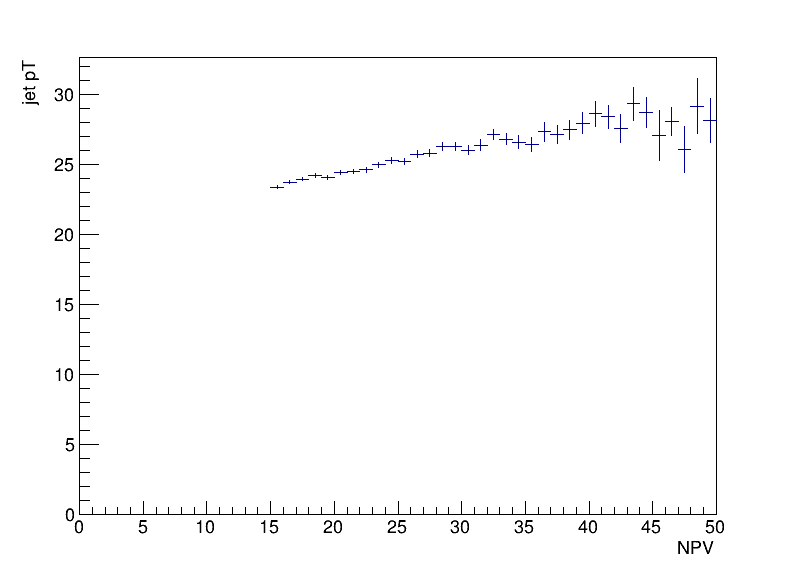

Info in <TCanvas::Print>: png file ./Images/reco4_pt_npv.png has been created


In [5]:
prof_recoR4pt_npv->Draw("");
prof_recoR4pt_npv->SetStats(0);
canvas2->Draw();
canvas2->SaveAs("./Images/reco4_pt_npv.png");

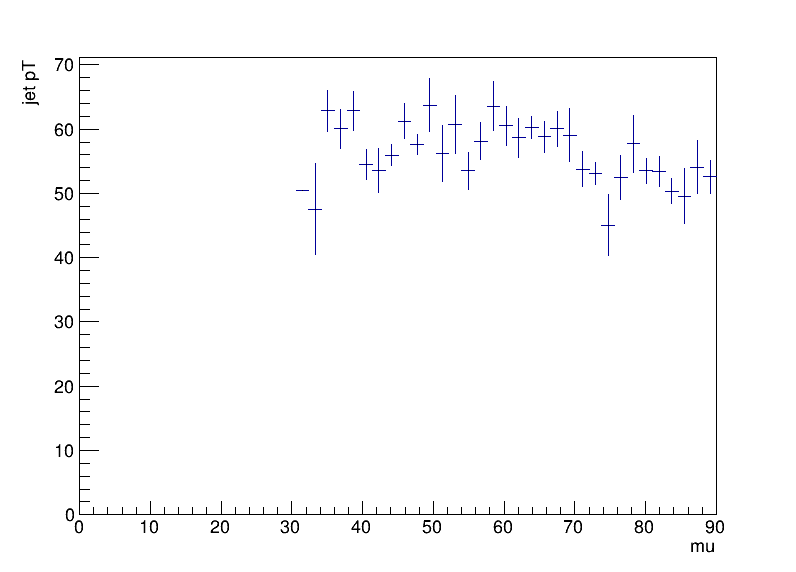

Info in <TCanvas::Print>: png file ./Images/reco4_pt_mu.png has been created


In [6]:
prof_recoR4pt_mu->Draw("");
prof_recoR4pt_mu->SetStats(0);
canvas2->Draw();
canvas2->SaveAs("./Images/reco4_pt_mu.png");

El momento transverso de los jets reco presenta un pileup aproximadamente lineal creciente con respecto al número de vertices primarios, sin embargo respecto al numero promedio de interacciones promedio, este momento es aproximadamente constante o como una función cuadrática (parabola invertida) cuyo vertice esta aproximadamente en 60.  

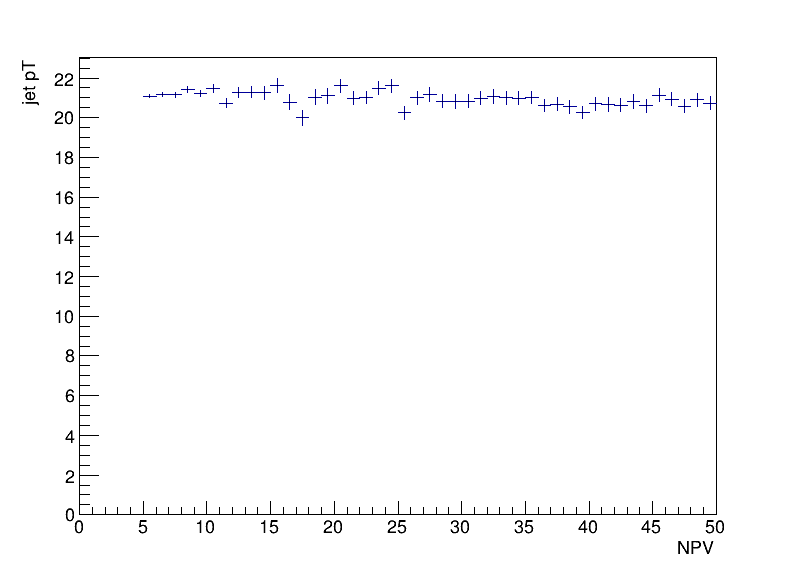

Info in <TCanvas::Print>: png file ./Images/truth4_pt_npv.png has been created


In [7]:
prof_truthR4pt_npv->Draw("");
prof_truthR4pt_npv->SetStats(0);
canvas2->Draw();
canvas2->SaveAs("./Images/truth4_pt_npv.png");

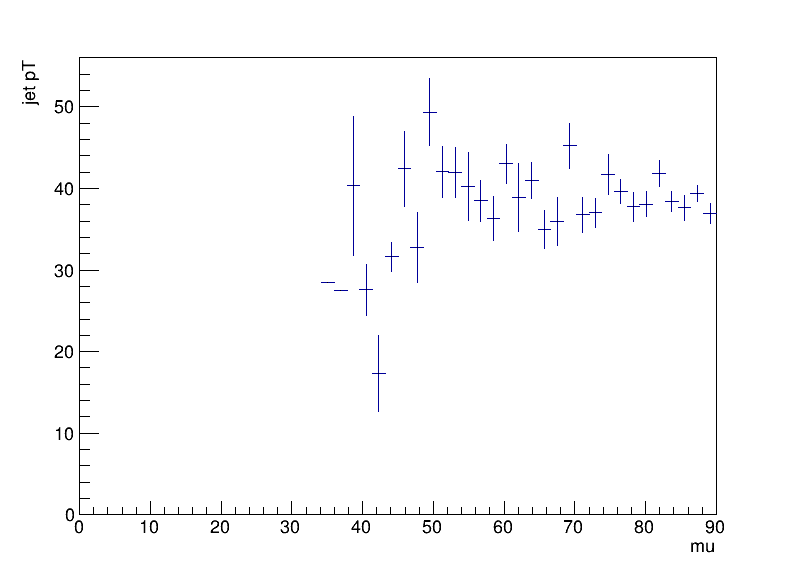

Info in <TCanvas::Print>: png file ./Images/truth4_pt_mu.png has been created


In [8]:
prof_truthR4pt_mu->Draw("");
prof_truthR4pt_mu->SetStats(0);
canvas2->Draw();
canvas2->SaveAs("./Images/truth4_pt_mu.png");